In [13]:
# Artificial Neural Network


# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle as pickle 
# Importing the dataset
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

## Concatenate the Data Frames

X=pd.concat([X,geography,gender],axis=1)

## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)
print(X.columns)

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Germany', 'Spain', 'Male'],
      dtype='object')


In [2]:
import tensorflow as tf
(tf.__version__)

'2.0.0'

In [15]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Part 2 - Now let's make the ANN!

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout



In [18]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 6, init = 'he_uniform',activation='relu',input_dim = 11))

# Adding the second hidden layer
classifier.add(Dense(output_dim = 6, init = 'he_uniform',activation='relu'))
# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'glorot_uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
model=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, nb_epoch = 150)

# save the model to disk
filename = 'model.pkl'
pickle.dump(model, open(filename, 'wb'))



C:\Users\ASLAM\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=11, units=6, kernel_initializer="he_uniform")`
  """
C:\Users\ASLAM\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="he_uniform")`
  
C:\Users\ASLAM\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="glorot_uniform")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\ASLAM\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:16: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  app.launch_new_instance()


Train on 5359 samples, validate on 2641 samples
Epoch 1/150
5359/5359 [==============================] - 2s 307us/step - loss: 0.5318 - accuracy: 0.7903 - val_loss: 0.4994 - val_accuracy: 0.7955
Epoch 2/150
5359/5359 [==============================] - 1s 278us/step - loss: 0.4847 - accuracy: 0.7962 - val_loss: 0.4760 - val_accuracy: 0.7955
Epoch 3/150
5359/5359 [==============================] - 2s 287us/step - loss: 0.4647 - accuracy: 0.7962 - val_loss: 0.4617 - val_accuracy: 0.7970
Epoch 4/150
5359/5359 [==============================] - 2s 291us/step - loss: 0.4503 - accuracy: 0.8011 - val_loss: 0.4526 - val_accuracy: 0.8012
Epoch 5/150
5359/5359 [==============================] - 2s 280us/step - loss: 0.4403 - accuracy: 0.8082 - val_loss: 0.4461 - val_accuracy: 0.8027
Epoch 6/150
5359/5359 [==============================] - 1s 272us/step - loss: 0.4330 - accuracy: 0.8123 - val_loss: 0.4414 - val_accuracy: 0.8073
Epoch 7/150
5359/5359 [==============================] - 1s 266us/step

5359/5359 [==============================] - 1s 263us/step - loss: 0.3350 - accuracy: 0.8625 - val_loss: 0.3650 - val_accuracy: 0.8482
Epoch 57/150
5359/5359 [==============================] - 1s 270us/step - loss: 0.3347 - accuracy: 0.8628 - val_loss: 0.3648 - val_accuracy: 0.8516
Epoch 58/150
5359/5359 [==============================] - 1s 255us/step - loss: 0.3347 - accuracy: 0.8640 - val_loss: 0.3642 - val_accuracy: 0.8489
Epoch 59/150
5359/5359 [==============================] - 1s 265us/step - loss: 0.3349 - accuracy: 0.8625 - val_loss: 0.3638 - val_accuracy: 0.8482
Epoch 60/150
5359/5359 [==============================] - 1s 272us/step - loss: 0.3344 - accuracy: 0.8628 - val_loss: 0.3639 - val_accuracy: 0.8482
Epoch 61/150
5359/5359 [==============================] - 1s 266us/step - loss: 0.3344 - accuracy: 0.8634 - val_loss: 0.3637 - val_accuracy: 0.8485
Epoch 62/150
5359/5359 [==============================] - 1s 255us/step - loss: 0.3343 - accuracy: 0.8638 - val_loss: 0.3647 

5359/5359 [==============================] - 1s 257us/step - loss: 0.3318 - accuracy: 0.8655 - val_loss: 0.3609 - val_accuracy: 0.8519
Epoch 112/150
5359/5359 [==============================] - 1s 256us/step - loss: 0.3322 - accuracy: 0.8662 - val_loss: 0.3600 - val_accuracy: 0.8508
Epoch 113/150
5359/5359 [==============================] - 1s 249us/step - loss: 0.3320 - accuracy: 0.8649 - val_loss: 0.3597 - val_accuracy: 0.8504
Epoch 114/150
5359/5359 [==============================] - 1s 262us/step - loss: 0.3318 - accuracy: 0.8660 - val_loss: 0.3592 - val_accuracy: 0.8501
Epoch 115/150
5359/5359 [==============================] - 1s 256us/step - loss: 0.3316 - accuracy: 0.8634 - val_loss: 0.3599 - val_accuracy: 0.8523
Epoch 116/150
5359/5359 [==============================] - 1s 258us/step - loss: 0.3317 - accuracy: 0.8653 - val_loss: 0.3591 - val_accuracy: 0.8523
Epoch 117/150
5359/5359 [==============================] - 1s 262us/step - loss: 0.3316 - accuracy: 0.8642 - val_loss: 0

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


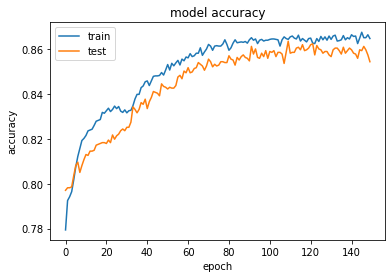

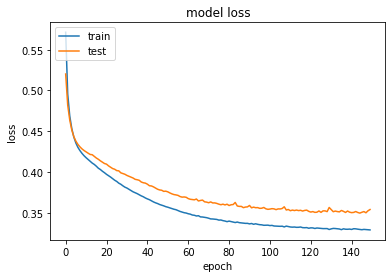

[[1541   54]
 [ 226  179]]
0.86


In [10]:
# list all data in history
print(model_history)
print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print(cm)

# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
print(score)